In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, shapiro, mannwhitneyu
from statsmodels.duration.hazard_regression import PHReg
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Carregar o dataset
df = pd.read_parquet('https://github.com/cleodecker/Cancer/raw/refs/heads/main/Base_Dados/dados_cancer.parquet')
df

,DTOBITO,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,CODMUNRES,CODMUNOCOR,LINHAA,LINHAB,LINHAC,LINHAD,LINHAII,CAUSABAS,ANO_OBITO
0,2013-01-01,1960-04-06,52.0,Masculino,Parda,Casado,1 a 3 anos,250420,250420,*J960,*C01X,None,None,*I10X,C01,2013
1,2013-04-18,1949-05-08,63.0,Masculino,Branca,Viúvo,Nenhuma,251276,251276,*E46X,*R092,*C069,None,None,C069,2013
2,2013-04-13,1946-02-20,67.0,Masculino,Parda,Solteiro,Nenhuma,250060,250060,*C068,*C048,None,None,None,C068,2013
3,2013-01-13,1922-11-13,90.0,Feminino,Parda,Viúvo,Nenhuma,250100,250100,*C069,*R960,None,None,None,C069,2013
4,2013-04-09,1918-06-21,94.0,Masculino,Branca,Solteiro,Nenhuma,250810,250810,*E440,*C069,*F102,None,*F102,C069,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,2023-12-25,1944-04-12,79.0,Masculino,Parda,Viúvo,1 a 3 anos,250750,250750,*C029,None,None,None,*C329*F179,C029,2023
1061,2023-12-26,1969-12-29,53.0,Masculino,Parda,None,None,250750,250750,*J960,*C059,None,None,None,C059,2023
1062,2023-12-29,1976-07-14,47.0,Masculino,Parda,None,None,250240,250370,*J960,*A419,*L089,*C329,*C029,C329,2023
1063,2023-12-31,1953-10-09,70.0,Masculino,Parda,União consensual,4 a 7 anos,250280,250280,*R092,*I219,*C069,*I10X,None,C069,2023


count    1065.000000
mean       68.338967
std        14.810477
min        23.000000
25%        57.000000
50%        68.000000
75%        80.000000
max       107.000000
Name: IDADE, dtype: float64
           count       mean        std   min   25%   50%   75%    max
SEXO                                                                 
Feminino   352.0  73.409091  15.601984  24.0  64.0  76.0  85.0  107.0
Masculino  713.0  65.835905  13.740768  23.0  56.0  65.0  76.0  104.0
Mediana da IDADE: 68.0
SEXO
Feminino     76.0
Masculino    65.0
Name: IDADE, dtype: float64


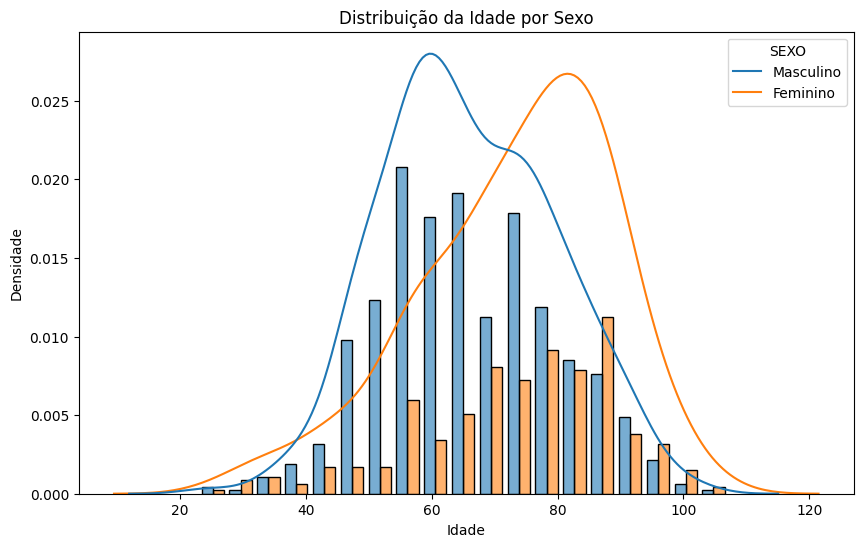

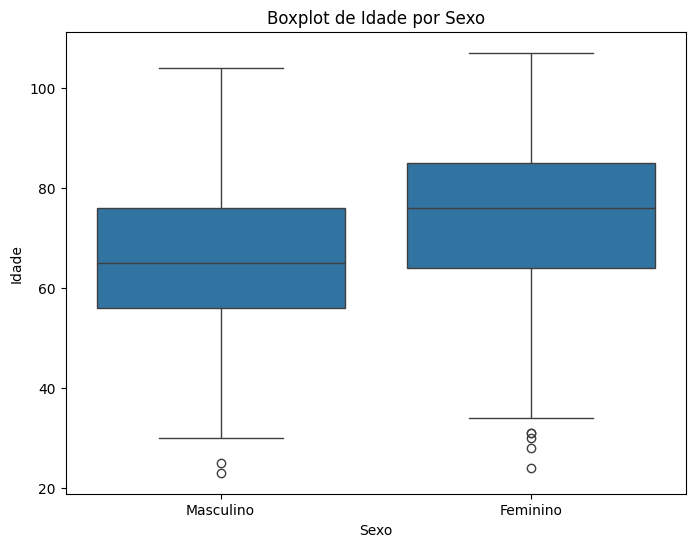

In [3]:
# Estatísticas para IDADE
idade_stats = df['IDADE'].describe()
print(idade_stats)

# Estatísticas para IDADE por SEXO
idade_por_sexo = df.groupby('SEXO')['IDADE'].describe()
print(idade_por_sexo)

# Mediana separadamente
mediana_idade = df['IDADE'].median()
print(f'Mediana da IDADE: {mediana_idade}')

# Mediana por sexo
mediana_por_sexo = df.groupby('SEXO')['IDADE'].median()
print(mediana_por_sexo)

# Distribuição e Densidade para IDADE por SEXO
plt.figure(figsize=(10, 6))
# Histograma justaposto
sns.histplot(data=df, x='IDADE', hue='SEXO', multiple='dodge', stat='density',
             shrink=0.8, alpha=0.6)
# Curva KDE por cima
sns.kdeplot(data=df, x='IDADE', hue='SEXO', common_norm=False)
plt.title('Distribuição da Idade por Sexo')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.show()

# Boxplot para IDADE por SEXO
plt.figure(figsize=(8, 6))
sns.boxplot(x='SEXO', y='IDADE', data=df)
plt.xlabel('Sexo')
plt.ylabel('Idade')
plt.title('Boxplot de Idade por Sexo')
plt.suptitle('')
plt.show()


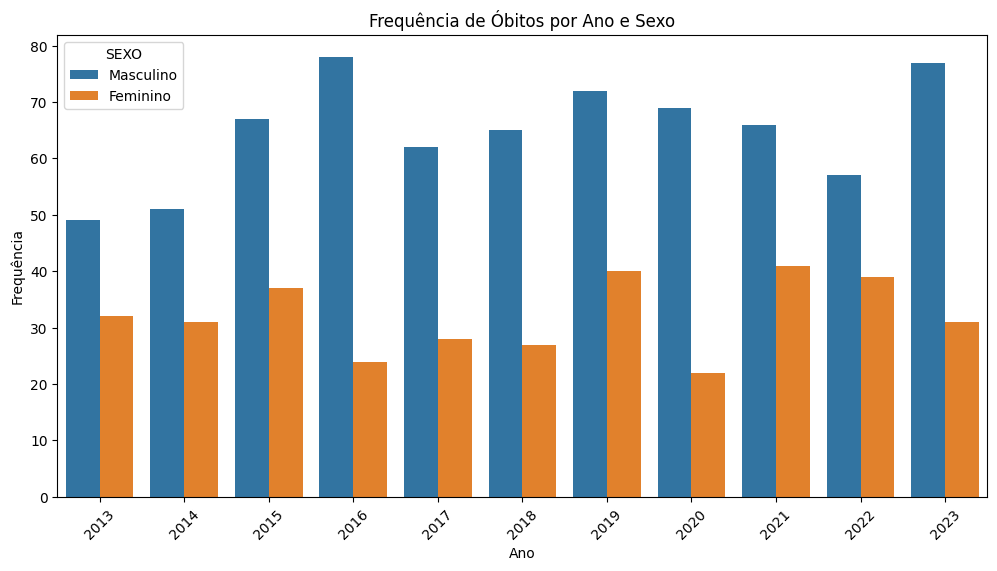

In [5]:
# Frequência de Óbitos por ANO e SEXO
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='ANO_OBITO', hue='SEXO')
plt.title('Frequência de Óbitos por Ano e Sexo')
plt.xlabel('Ano')
plt.xticks(rotation=45)
plt.ylabel('Frequência')

# Alterar legendas
handles, labels = ax.get_legend_handles_labels()
new_labels = df['SEXO'].unique()
ax.legend(handles, new_labels, title='SEXO')

plt.show()

           Frequência  Percentual
SEXO                             
Masculino         713   66.948357
Feminino          352   33.051643
Could not find RACACOR_ columns. Please check the column names.
          Frequência  Percentual
RACACOR                         
Parda            693   69.369369
Branca           261   26.126126
Preta             42    4.204204
Amarela            2    0.200200
Indígena           1    0.100100
          Frequência  Percentual
CAUSABAS                        
C069             375   35.211268
C029             261   24.507042
C01               63    5.915493
C07               54    5.070423
C059              54    5.070423
...              ...         ...
I052               1    0.093897
G301               1    0.093897
C002               1    0.093897
A162               1    0.093897
C003               1    0.093897

[85 rows x 2 columns]


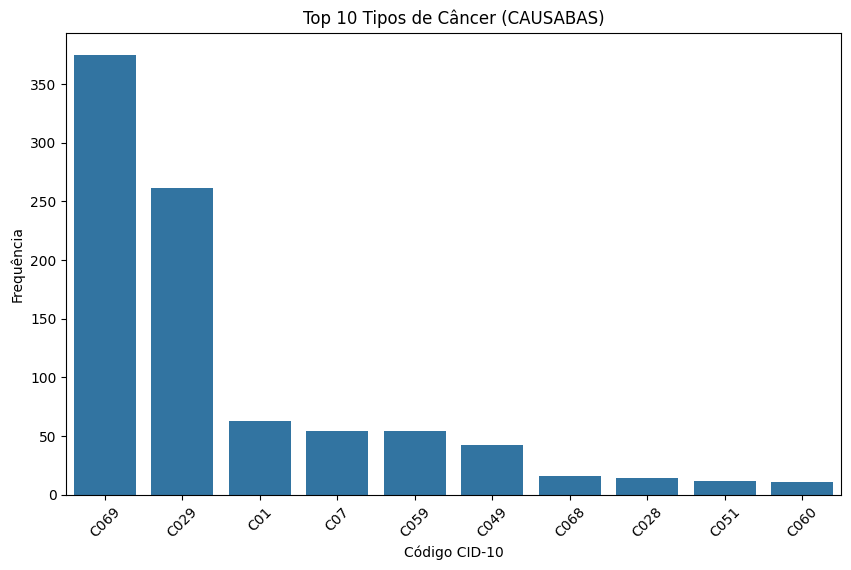

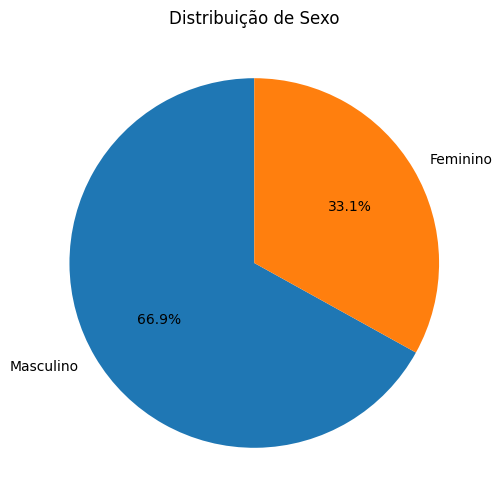

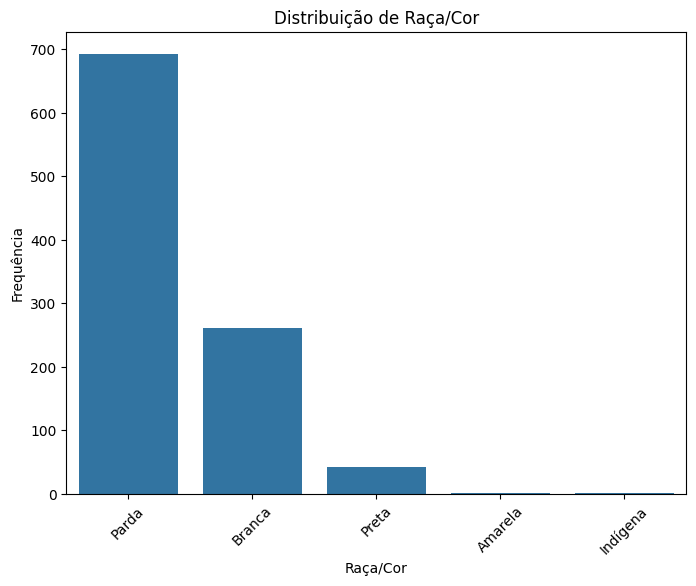

In [7]:
# Frequências absolutas e relativas para SEXO
sexo_freq = df['SEXO'].value_counts()
sexo_percent = df['SEXO'].value_counts(normalize=True) * 100
print(pd.concat([sexo_freq, sexo_percent], axis=1, keys=['Frequência', 'Percentual']))

# Para RACACOR
racacor_cols = ['RACACOR_Parda', 'RACACOR_Branca', 'RACACOR_Preta', 'RACACOR_Indígena']
# Assuming RACACOR has already been one-hot encoded or similar,
# otherwise, we need to adjust this part as well.
# For now, keeping the original logic for racacor, assuming the columns exist.
try:
    racacor_freq = df[racacor_cols].sum().sort_values(ascending=False)
    racacor_percent = (racacor_freq / racacor_freq.sum()) * 100
    print(pd.concat([racacor_freq, racacor_percent], axis=1, keys=['Frequência', 'Percentual']))
except KeyError:
    print("Could not find RACACOR_ columns. Please check the column names.")
    # Fallback to original RACACOR column if the one-hot encoded columns are not found
    racacor_freq = df['RACACOR'].value_counts()
    racacor_percent = df['RACACOR'].value_counts(normalize=True) * 100
    print(pd.concat([racacor_freq, racacor_percent], axis=1, keys=['Frequência', 'Percentual']))
    racacor_cols = racacor_freq.index.tolist() # Update racacor_cols for plotting

# Para CAUSABAS (tipos de câncer)
causabas_freq = df['CAUSABAS'].value_counts()
causabas_percent = df['CAUSABAS'].value_counts(normalize=True) * 100
print(pd.concat([causabas_freq, causabas_percent], axis=1, keys=['Frequência', 'Percentual']))

# Gráfico de barras para 10 primeiros CAUSABAS
top_10_causabas = df['CAUSABAS'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_causabas.index, y=top_10_causabas.values)
plt.title('Top 10 Tipos de Câncer (CAUSABAS)')
plt.xlabel('Código CID-10')
plt.xticks(rotation=45)
plt.ylabel('Frequência')
plt.show()

# Gráfico de Pizza para SEXO
plt.figure(figsize=(6, 6))
plt.pie(sexo_freq, labels=sexo_freq.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Sexo')
plt.show()

# Gráfico de Barra para RACACOR
plt.figure(figsize=(8, 6))
if 'RACACOR_Parda' in df.columns:
    sns.barplot(x=[x.replace('RACACOR_', '') for x in racacor_freq.index],
                y=racacor_freq.values)
else:
     sns.barplot(x=racacor_freq.index, y=racacor_freq.values)
plt.title('Distribuição de Raça/Cor')
plt.xlabel('Raça/Cor')
plt.xticks(rotation=45)
plt.ylabel('Frequência')
plt.show()

In [9]:
# Explorar a relação entre CAUSABAS e SEXO usando uma tabela de contingência
tabela_contingencia = pd.crosstab(df['SEXO'], df['CAUSABAS'])
display(tabela_contingencia)

# Realizar o teste do qui-quadrado
qui2, p_valor, gl, esperados = chi2_contingency(tabela_contingencia)

print(f"Estatística qui-quadrado: {qui2}")
print(f"Valor-p: {p_valor}")
print(f"Graus de liberdade: {gl}")

# Interpretar os resultados
alfa = 0.05
if p_valor < alfa:
    print("Há uma associação estatisticamente significativa entre CAUSABAS e SEXO.")
else:
    print("Não há associação estatisticamente significativa entre CAUSABAS e SEXO.")

CAUSABAS,A162,B218,B342,C000,C002,C003,C004,C005,C009,C01,...,J40,J449,K137,K920,L021,N10,N12,N390,W790,Y838
SEXO,,,,,,,,,,,,,,,,,,,,,
Feminino,0,0,0,1,0,1,0,2,2,20,...,1,1,0,0,0,1,1,1,0,0
Masculino,1,1,4,2,1,0,1,0,1,43,...,0,0,1,1,1,0,0,1,1,1


Estatística qui-quadrado: 99.2070286899095
Valor-p: 0.12305974854703502
Graus de liberdade: 84
Não há associação estatisticamente significativa entre CAUSABAS e SEXO.


In [14]:
# Explorar a relação entre CAUSABAS e RACACOR usando uma tabela de contingência
# Restringir CAUSABAS apenas 'C...'
df1 = df[df['CAUSABAS'].str.startswith('C0')]



tabela_contingencia = pd.crosstab(df1['RACACOR'], df1['CAUSABAS'])
display(tabela_contingencia)

# Realizar o teste do qui-quadrado
qui2, p_valor, gl, esperados = chi2_contingency(tabela_contingencia)

print(f"Estatística qui-quadrado: {qui2}")
print(f"Valor-p: {p_valor}")
print(f"Graus de liberdade: {gl}")

# Interpretar os resultados
alfa = 0.05
if p_valor < alfa:
    print("Há uma associação estatisticamente significativa entre CAUSABAS e RACACOR.")
else:
    print("Não há associação estatisticamente significativa entre CAUSABAS e RACACOR.")

CAUSABAS,C000,C002,C003,C004,C005,C009,C01,C020,C021,C023,...,C058,C059,C060,C061,C068,C069,C07,C080,C081,C089
RACACOR,,,,,,,,,,,,,,,,,,,,,
Amarela,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Branca,2,1,1,1,1,1,17,1,3,0,...,1,7,2,1,7,86,18,1,0,1
Indígena,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Parda,1,0,0,0,1,2,40,4,0,1,...,3,40,6,0,6,249,29,4,1,3
Preta,0,0,0,0,0,0,3,1,0,0,...,0,3,1,0,3,16,1,0,0,0


Estatística qui-quadrado: 87.31937251625052
Valor-p: 0.9891225359485959
Graus de liberdade: 120
Não há associação estatisticamente significativa entre CAUSABAS e RACACOR.


           Frequência  Percentual
CODMUNRES                        
250750            245   46.401515
250400            102   19.318182
251370             45    8.522727
250180             30    5.681818
251080             24    4.545455
251620             21    3.977273
250320             17    3.219697
250370             16    3.030303
251250             15    2.840909
250890             13    2.462121


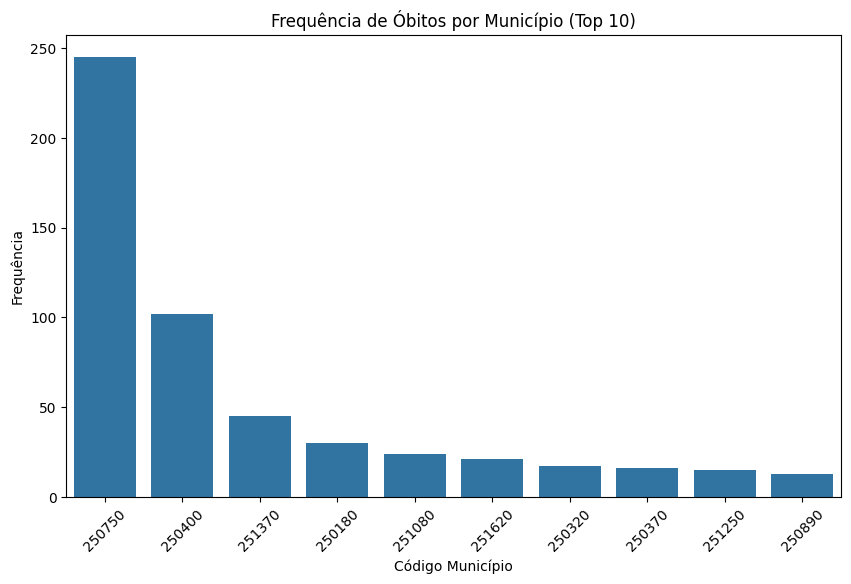

In [12]:
# Frequências por CODMUNRES
mun_freq = df['CODMUNRES'].value_counts().head(10)  # Top 10

# Frequências absolutas e relativas
print(pd.concat([mun_freq, mun_freq / mun_freq.sum() * 100], axis=1, keys=['Frequência', 'Percentual']))

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=mun_freq.index, y=mun_freq.values)
plt.title('Frequência de Óbitos por Município (Top 10)')
plt.xlabel('Código Município')
plt.xticks(rotation=45)
plt.ylabel('Frequência')
plt.show()

                        Frequência  Percentual
ESTCIV                                        
Casado                         376   41.364136
Solteiro                       260   28.602860
Viúvo                          189   20.792079
Separado judicialmente          52    5.720572
União consensual                32    3.520352


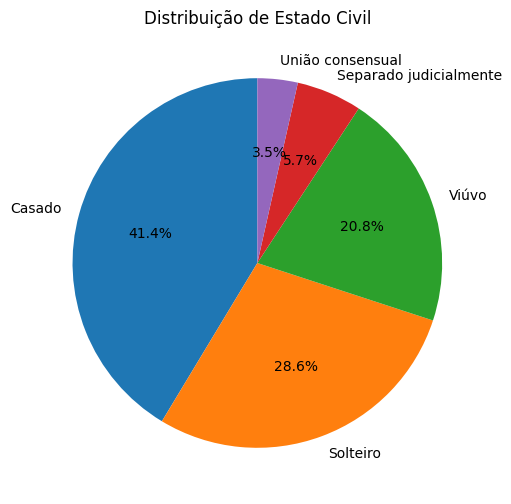

In [16]:
# Frequência absoluta e relativa de ESTCIV
estciv_freq = df['ESTCIV'].value_counts()
estciv_percent = df['ESTCIV'].value_counts(normalize=True) * 100
print(pd.concat([estciv_freq, estciv_percent], axis=1, keys=['Frequência', 'Percentual']))

# Gráfico de Pizza
plt.figure(figsize=(6, 6))
plt.pie(estciv_freq, labels=estciv_freq.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Estado Civil')
plt.show()

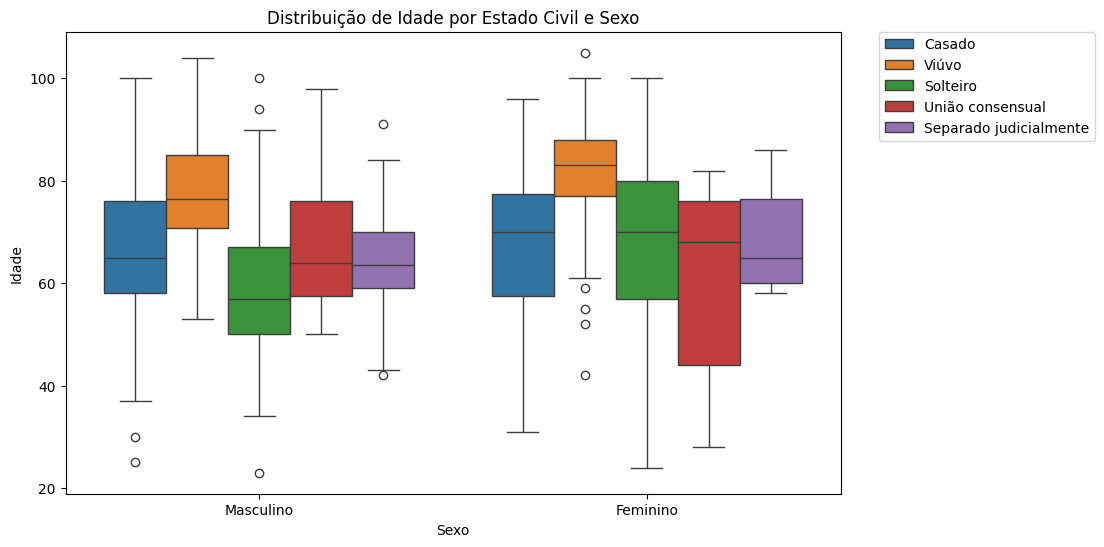

In [19]:
# Explorar associação entre IDADE e ESTCIV por SEXO
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEXO', y='IDADE', hue='ESTCIV', data=df)
plt.title('Distribuição de Idade por Estado Civil e Sexo')
plt.xlabel('Sexo')
plt.ylabel('Idade')
# Legenda ao lado
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [20]:
# Explorar relação entre ETSCIV e IDADE usando uma tabela de contingência
tabela_contingencia = pd.crosstab(df['IDADE'], df['ESTCIV'])
display(tabela_contingencia)

# Realizar o teste chi2
chi2, p_valor, dof, esperados = chi2_contingency(tabela_contingencia)

print(f"Estatística qui-quadrado: {chi2}")
print(f"Valor-p: {p_valor}")

# Interpretar os resultados
alfa = 0.05
if p_valor < alfa:
    print("Há uma associação estatisticamente significativa entre IDADE e ESTCIV.")
else:
    print("Não há associação estatisticamente significativa entre IDADE e ESTCIV.")


ESTCIV,Casado,Separado judicialmente,Solteiro,União consensual,Viúvo
IDADE,,,,,
23.0,0,0,1,0,0
24.0,0,0,1,0,0
25.0,1,0,0,0,0
28.0,0,0,0,1,0
30.0,1,0,1,0,0
...,...,...,...,...,...
99.0,0,0,2,0,1
100.0,1,0,2,0,1
102.0,0,0,0,0,1


Estatística qui-quadrado: 478.2169918006157
Valor-p: 9.545990714260934e-11
Há uma associação estatisticamente significativa entre IDADE e ESTCIV.
